In [ ]:

import nltk
nltk.download("words")
nltk.download("stopwords")
#nltk.download("wordnet")
#nltk.download('omw-1.4')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1]:
#Uncomment this cell if using google colab
'''
## Connect Google drive
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount = True)

path = "/content/gdrive/MyDrive/Fifth Semester/consumer_complaints.csv"    '''

'\n## Connect Google drive\nfrom google.colab import drive\nimport os\ndrive.mount(\'/content/gdrive\', force_remount = True)\n\npath = "/content/gdrive/MyDrive/Fifth Semester/consumer_complaints.csv"    '

In [5]:
#Uncomment this cell when using local machine
path = "consumer_complaints.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

#stop = stopwords.words('english')


# This is used for fast string concatination
from io import StringIO
import re

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label

# Use nltk for valid words
import nltk
# Need to make hash 'dictionaries' from nltk for fast processing
import collections as co

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.manifold import TSNE
#from cuml.manifold import TSNE


from nltk.stem import SnowballStemmer,WordNetLemmatizer,PorterStemmer,LancasterStemmer

from collections import Counter
import ast


from wordcloud import WordCloud

words = co.Counter(nltk.corpus.words.words())
stopWords = co.Counter( nltk.corpus.stopwords.words() )

In [6]:
# Read the input
df = pd.read_csv(path) 
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963


In [7]:
#view customer complaint narrative because it will be the basis of sentiment analysis
df[~df["consumer_complaint_narrative"].isna()]

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553084,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,"XXXX XXXX is reporting incorrectly, payments h...",Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1782682
553085,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,Reflecting incorrect payment status. Have been...,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1781861
553086,02/11/2016,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,I have been paying {$180.00} a month through d...,NaN,Zarvad III S.A.,NV,891XX,Servicemember,Consent provided,Web,02/11/2016,Closed with explanation,Yes,No,1782804
553090,03/30/2016,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,I recently became aware that Amerisave Mortgag...,Company believes it acted appropriately as aut...,Amerisave,AZ,853XX,NaN,Consent provided,Web,03/30/2016,Closed with explanation,Yes,Yes,1855199


In [8]:
#make dataframe only one column with the complaint column
df = df[["consumer_complaint_narrative"]].copy()
df

,consumer_complaint_narrative
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
555952,NaN
555953,NaN
555954,NaN
555955,NaN


## Select rows without null values in customer complaints narrative column as new dataframe
### Observations
- Records reduced from over 550k to ~66k

In [9]:
# Only interested in data with consumer complaints removing null values
df = df[~df["consumer_complaint_narrative"].isna()]
df

,consumer_complaint_narrative
190126,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Due to inconsistencies in the amount owed that...
190155,In XX/XX/XXXX my wages that I earned at my job...
190207,I have an open and current mortgage with Chase...
190208,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...
553084,"XXXX XXXX is reporting incorrectly, payments h..."
553085,Reflecting incorrect payment status. Have been...
553086,I have been paying {$180.00} a month through d...
553090,I recently became aware that Amerisave Mortgag...


In [10]:
#make all strings in every row lowercase
df["consumer_complaint_narrative"] = df["consumer_complaint_narrative"].apply(lambda x: x.lower())
df

,consumer_complaint_narrative
190126,xxxx has claimed i owe them {$27.00} for xxxx ...
190135,due to inconsistencies in the amount owed that...
190155,in xx/xx/xxxx my wages that i earned at my job...
190207,i have an open and current mortgage with chase...
190208,xxxx was submitted xx/xx/xxxx. at the time i s...
...,...
553084,"xxxx xxxx is reporting incorrectly, payments h..."
553085,reflecting incorrect payment status. have been...
553086,i have been paying {$180.00} a month through d...
553090,i recently became aware that amerisave mortgag...


In [11]:
#count words in each row
df['word_count'] = df['consumer_complaint_narrative'].apply(lambda x: len(str(x).split(" ")))
df

,consumer_complaint_narrative,word_count
190126,xxxx has claimed i owe them {$27.00} for xxxx ...,56
190135,due to inconsistencies in the amount owed that...,249
190155,in xx/xx/xxxx my wages that i earned at my job...,667
190207,i have an open and current mortgage with chase...,76
190208,xxxx was submitted xx/xx/xxxx. at the time i s...,260
...,...,...
553084,"xxxx xxxx is reporting incorrectly, payments h...",21
553085,reflecting incorrect payment status. have been...,9
553086,i have been paying {$180.00} a month through d...,130
553090,i recently became aware that amerisave mortgag...,238


In [12]:
def _removeNonAscii(s): 
    """
    Function to remove non ascii values in rows of text in dataframe"""
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    """
    Function to clean text in each row of text in dataframe"""
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [13]:
#Reset dataframe index for indexing while iterating
df = df.reset_index()
df

,index,consumer_complaint_narrative,word_count
0,190126,xxxx has claimed i owe them {$27.00} for xxxx ...,56
1,190135,due to inconsistencies in the amount owed that...,249
2,190155,in xx/xx/xxxx my wages that i earned at my job...,667
3,190207,i have an open and current mortgage with chase...,76
4,190208,xxxx was submitted xx/xx/xxxx. at the time i s...,260
...,...,...,...
66801,553084,"xxxx xxxx is reporting incorrectly, payments h...",21
66802,553085,reflecting incorrect payment status. have been...,9
66803,553086,i have been paying {$180.00} a month through d...,130
66804,553090,i recently became aware that amerisave mortgag...,238


In [14]:
#removing non ascii values iteratively by calling predifined function on each row
for i in range(len(df)):
    
    
    df['consumer_complaint_narrative'][i] = _removeNonAscii(df['consumer_complaint_narrative'][i])
    
df

,index,consumer_complaint_narrative,word_count
0,190126,xxxx has claimed i owe them {$27.00} for xxxx ...,56
1,190135,due to inconsistencies in the amount owed that...,249
2,190155,in xx/xx/xxxx my wages that i earned at my job...,667
3,190207,i have an open and current mortgage with chase...,76
4,190208,xxxx was submitted xx/xx/xxxx. at the time i s...,260
...,...,...,...
66801,553084,"xxxx xxxx is reporting incorrectly, payments h...",21
66802,553085,reflecting incorrect payment status. have been...,9
66803,553086,i have been paying {$180.00} a month through d...,130
66804,553090,i recently became aware that amerisave mortgag...,238


In [15]:
#cleaning text by removing punctuations iteratively
for i in range(len(df)):
    
    
    df['consumer_complaint_narrative'][i] = clean_text(df['consumer_complaint_narrative'][i])
    
df

,index,consumer_complaint_narrative,word_count
0,190126,xxxx has claimed i owe them for xxxx years d...,56
1,190135,due to inconsistencies in the amount owed that...,249
2,190155,in xx xx xxxx my wages that i earned at my job...,667
3,190207,i have an open and current mortgage with chase...,76
4,190208,xxxx was submitted xx xx xxxx at the time i su...,260
...,...,...,...
66801,553084,xxxx xxxx is reporting incorrectly payments ha...,21
66802,553085,reflecting incorrect payment status have been ...,9
66803,553086,i have been paying a month through direct de...,130
66804,553090,i recently became aware that amerisave mortgag...,238


In [16]:
#checking words for stopwords and removing stopwords
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: " ".join(x for x in x.split() if x in words and x not in stopWords))
df

,index,consumer_complaint_narrative,word_count
0,190126,owe despite proof payment check invoice contin...,56
1,190135,due amount told bank amount credit advised wri...,249
2,190155,wages job half knew trouble home loan home loa...,667
3,190207,open current mortgage chase bank chase loan in...,76
4,190208,time complaint dealt mortgage directly stop co...,260
...,...,...,...
66801,553084,incorrectly time vehicle turned time dealership,21
66802,553085,reflecting incorrect payment status time,9
66803,553086,paying month direct debit withdrawal account l...,130
66804,553090,recently aware mortgage corporation illegal ha...,238


## Prepare whole column as a string for plotting word cloud 

In [17]:
s = StringIO()

#write all rows of customer complaints column into a single string
df['consumer_complaint_narrative'].apply(lambda x: s.write(x))

sent = s.getvalue()  #save  string into a new variable
s.close()
#sent = sent.lower()  #make all to lowercase
#print(k)
sent = sent.split()  #split sentence into list

In [18]:
len(sent)

3311848

In [19]:
#valid_words = [i for i in sent if i in words and i not in stopWords]  #clean text by removing stopwords
strings = " ".join(sent)  #string of entire comment
coll = co.Counter(sent)    #collection of words

In [20]:
# visualize 14 most common words
coll.most_common(14)

[('credit', 82579),
 ('account', 71178),
 ('loan', 45361),
 ('payment', 43433),
 ('bank', 40696),
 ('told', 36468),
 ('debt', 33066),
 ('report', 31252),
 ('information', 30204),
 ('mortgage', 29145),
 ('time', 29014),
 ('received', 28906),
 ('card', 28843),
 ('company', 26724)]

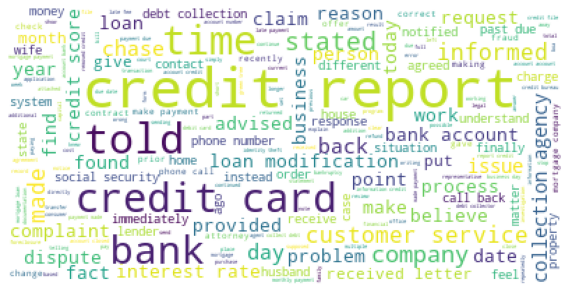

In [21]:
# Read the whole text.
text = strings

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(df),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Normalization

In [22]:
wl = WordNetLemmatizer()
#apply lemmatization
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: " ".join(wl.lemmatize(x,'v') for x in x.split()))
df

,index,consumer_complaint_narrative,word_count
0,190126,owe despite proof payment check invoice contin...,56
1,190135,due amount tell bank amount credit advise writ...,249
2,190155,wag job half know trouble home loan home loan ...,667
3,190207,open current mortgage chase bank chase loan in...,76
4,190208,time complaint deal mortgage directly stop con...,260
...,...,...,...
66801,553084,incorrectly time vehicle turn time dealership,21
66802,553085,reflect incorrect payment status time,9
66803,553086,pay month direct debit withdrawal account loan...,130
66804,553090,recently aware mortgage corporation illegal ha...,238


## Topic Modelling 
###  Bi-gram (2) and Tri-gram (3) are used to identify which two or three words show together

In [41]:
tfidf_v = TfidfVectorizer(min_df = 20, max_df = 0.8, sublinear_tf = True ,ngram_range = {2,3})
#transform the vectorized complaints
matrixTFIDF= tfidf_v.fit_transform(df['consumer_complaint_narrative'])
matrixTFIDF

<66806x26137 sparse matrix of type '<class 'numpy.float64'>'
	with 1706882 stored elements in Compressed Sparse Row format>

In [42]:
print(tfidf_v)


TfidfVectorizer(max_df=0.8, min_df=20, ngram_range={2, 3}, sublinear_tf=True)


In [48]:
print(matrixTFIDF.shape)

(66806, 26137)


In [49]:
#Analysing for first 10 topics
n_topics = 10

### Definition of helper functions which are: - 
- get_keys: for returning of transformed model either lsa or lda as a list
- key_to_counts: for identifying categories and counts of lsa keys as a tuple
- get_top_n_words: for returning list of n topic strings where n contains most common words

In [50]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [51]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [52]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

## Latent  Semantic Analysis

In [53]:
svd = TruncatedSVD(n_components=n_topics, n_iter = 10, random_state = 42)
X = svd.fit_transform(matrixTFIDF)       

In [54]:
def get_topics(components, feature_names, n=15):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx))
        print([(feature_names[i], topic[i])
        for i in topic.argsort()[:-n - 1:-1]])

In [55]:
#can be used to visualize all strings and their percentage 
get_topics(svd.components_,tfidf_v.get_feature_names())

Topic 0:
[('credit report', 0.6799515398489897), ('credit card', 0.22395232617942512), ('remove credit', 0.1580929789636295), ('remove credit report', 0.12400875692428083), ('collection agency', 0.1154922574474076), ('credit score', 0.10722848432882348), ('account credit', 0.1043471631460096), ('information credit', 0.09732808140835225), ('report credit', 0.0926260581508045), ('social security', 0.0739035211129935), ('account credit report', 0.06967821020493829), ('identity theft', 0.06944745357846774), ('credit bureau', 0.06898019094323035), ('information credit report', 0.06809530006448504), ('debt credit', 0.06753474761109336)]
Topic 1:
[('credit card', 0.49420861312859304), ('customer service', 0.13859644430372242), ('make payment', 0.12325851946914185), ('bank account', 0.11492635276585884), ('card account', 0.10064293096059915), ('close account', 0.09162230495782078), ('credit card account', 0.08796992028837344), ('card company', 0.08374786469364554), ('credit card company', 0.07

## From the list of ten topics below, the following general ideas can be establihed: - 
- Topic 0: Repayment
- Topic 1: Unsubscription from service
- Topic 2: Communication on Fraud activity
- Topic 3: Credit cards
- Topic 4: Identity Theft
- Topic 5: Identity Theft
- Topic 6: Customer data
- Topic 7: Unsubscription from service
- Topic 8: Data Alteration
- Topic 9: Inquiry

Note: it was  observed that using 1-gram and bigram, there was slight difference in topics

In [57]:
terms = tfidf_v.get_feature_names()
for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=" ")
    print(" ")

Topic 0: 
credit report credit card remove credit remove credit report collection agency credit score account credit  
Topic 1: 
credit card customer service make payment bank account card account close account credit card account  
Topic 2: 
view credit unauthorized fraudulent view credit report fraudulent inquiry credit act fair credit act fair credit  
Topic 3: 
credit card credit report card account credit card account card company credit card company card credit  
Topic 4: 
collection agency debt collection identity theft social security collect debt security number social security number  
Topic 5: 
identity theft victim identity victim identity theft social security security number social security number police report  
Topic 6: 
social security security number social security number phone number credit report time day cell phone  
Topic 7: 
remove credit bank account close account remove credit report account close account account account bank  
Topic 8: 
remove credit remove c

In [58]:
#Get keys for lsa model in a list
lsa_keys = get_keys(X)
#print(f"Lsa Keys: {lsa_keys}")


#Get categories and corresponding magnitude
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
print(lsa_categories)
print(lsa_counts)

[1, 0, 9, 4, 7, 5, 3, 6, 8, 2]
[25800, 20499, 4555, 4259, 4864, 1725, 1226, 1260, 1983, 635]


In [59]:
print(lsa_keys)

[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 9, 1, 0, 4, 7, 4, 1, 0, 1, 0, 0, 0, 5, 0, 0, 0, 4, 5, 0, 5, 5, 0, 5, 1, 1, 0, 5, 4, 7, 5, 4, 0, 5, 0, 1, 1, 0, 1, 1, 1, 1, 0, 4, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 9, 0, 1, 1, 3, 1, 5, 4, 0, 1, 1, 9, 1, 1, 6, 8, 4, 7, 1, 6, 1, 1, 0, 1, 7, 5, 1, 1, 9, 5, 4, 0, 7, 0, 0, 7, 6, 1, 5, 0, 0, 1, 7, 8, 0, 1, 1, 5, 5, 6, 0, 9, 9, 1, 1, 9, 1, 1, 0, 1, 7, 1, 8, 1, 9, 1, 1, 4, 7, 2, 9, 1, 0, 7, 0, 1, 4, 1, 1, 0, 3, 1, 3, 6, 9, 0, 1, 3, 9, 9, 7, 0, 4, 0, 8, 1, 7, 0, 0, 8, 7, 0, 1, 7, 8, 1, 0, 0, 1, 1, 3, 4, 1, 6, 1, 1, 0, 1, 9, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 4, 1, 1, 0, 9, 1, 4, 1, 1, 1, 1, 7, 0, 0, 1, 1, 1, 1, 0, 1, 8, 1, 0, 9, 1, 1, 1, 0, 9, 1, 1, 8, 0, 1, 1, 0, 1, 0, 1, 0, 0, 9, 1, 1, 8, 1, 9, 8, 1, 1, 0, 1, 0, 5, 7, 2, 7, 7, 0, 0, 4, 1, 1, 1, 5, 8, 1, 5, 0, 5, 1, 1, 9, 1, 5, 0, 5, 8, 8, 1, 9, 2, 9, 1, 1, 8, 2, 1, 0, 1, 1, 8, 0, 0, 4, 1, 0, 5, 1, 9, 1, 1, 2, 4, 1, 1, 4, 9, 1, 1, 9, 0, 7, 9, 7, 1, 1, 0, 0, 4, 7, 1, 1, 4, 1, 1, 1, 9, 1, 9, 4, 9, 1, 1, 0, 7, 1, 

## Below bar chart is to plot first n (1 - 5) words for each individual topics 
### It can be observed that topic one has most headlines

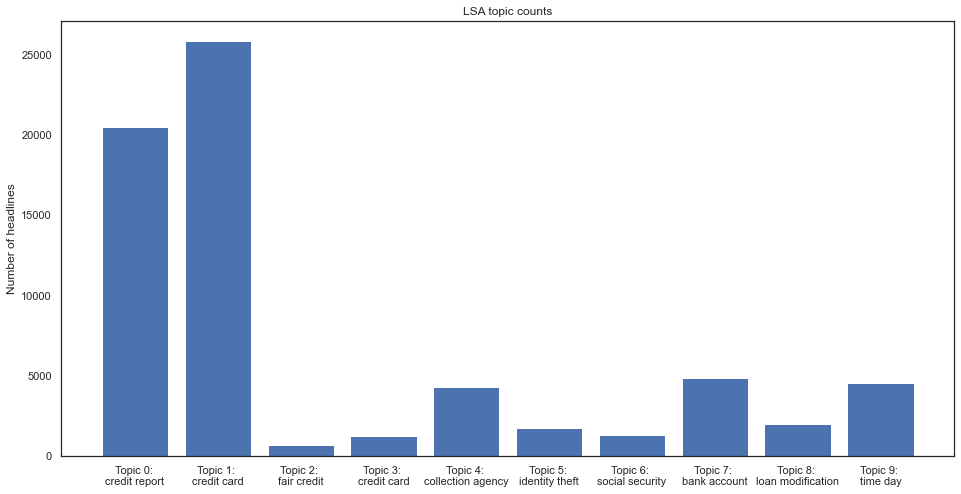

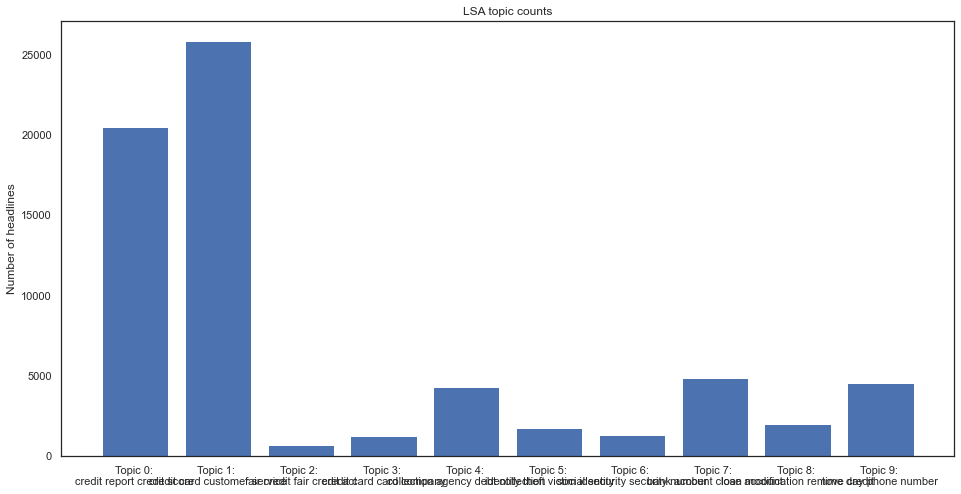

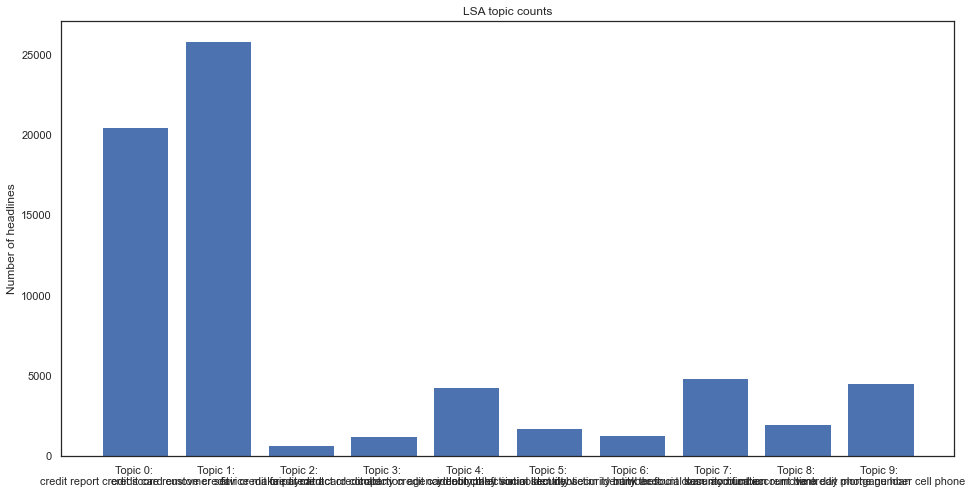

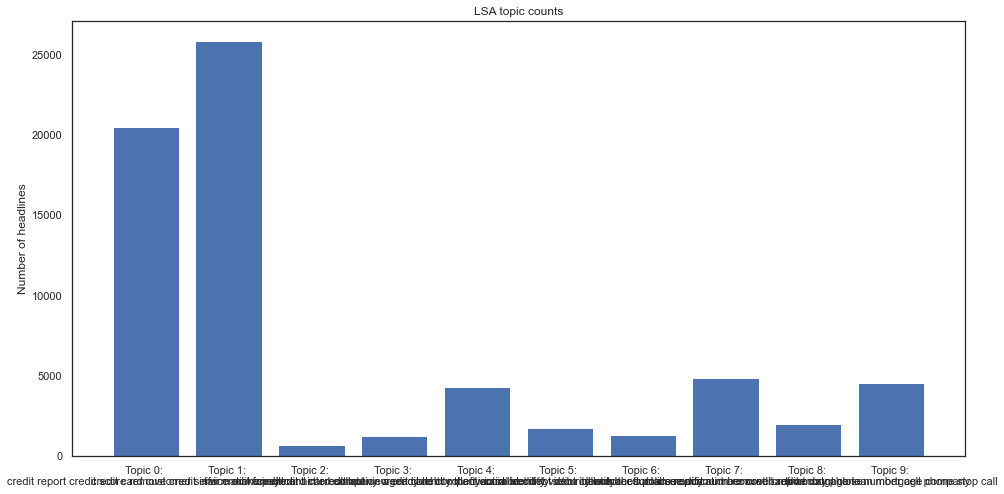

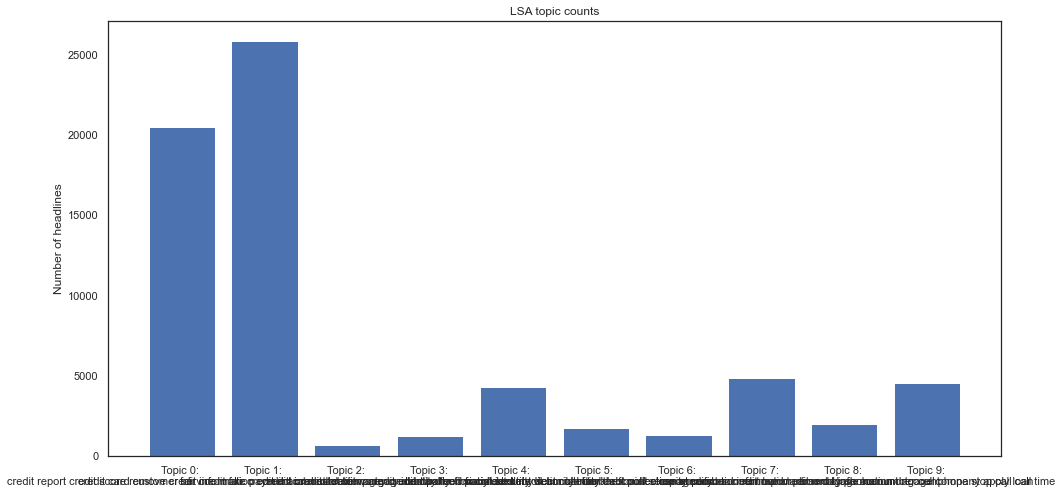

In [60]:
#Plot bar charts for top 5 words individually
n = 5
for i in range(n):

    top_n_words = get_top_n_words(i+1, lsa_keys, matrixTFIDF, tfidf_v)
    labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lsa_categories]

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(lsa_categories, lsa_counts);
    ax.set_xticks(lsa_categories);
    ax.set_xticklabels(labels);
    ax.set_ylabel('Number of headlines');
    ax.set_title('LSA topic counts');
    plt.show()

### In order to properly contrast LSA with LDA we instead use a dimensionality-reduction technique called  t -SNE, which will also serve to better illuminate the success of the clustering process


### NB
- It can be observed that TSNE function takes a lot of time to execute depending on machine specifications
- Scatter plot after TSNE opens in  new tab

In [68]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(X)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 66806 samples in 0.720s...
[t-SNE] Computed neighbors for 66806 samples in 77.223s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66806
[t-SNE] Computed conditional probabilities for sample 2000 / 66806
[t-SNE] Computed conditional probabilities for sample 3000 / 66806
[t-SNE] Computed conditional probabilities for sample 4000 / 66806
[t-SNE] Computed conditional probabilities for sample 5000 / 66806
[t-SNE] Computed conditional probabilities for sample 6000 / 66806
[t-SNE] Computed conditional probabilities for sample 7000 / 66806
[t-SNE] Computed conditional probabilities for sample 8000 / 66806
[t-SNE] Computed conditional probabilities for sample 9000 / 66806
[t-SNE] Computed conditional probabilities for sample 10000 / 66806
[t-SNE] Computed conditional probabilities for sample 11000 / 66806
[t-SNE] Computed conditional probabilities for sample 12000 / 66806
[t-SNE] Computed conditional probabilities for s

#### Having reduced n_topics-dimensional vectors to two-dimensional representation, clusters can be plotted using Bokeh for derving centroid location for each topic for better visualization

In [69]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [72]:
top_n_words_lsa = get_top_n_words(i, lsa_keys, matrixTFIDF, tfidf_v)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
    text=top_n_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

##  LDA

In [61]:
print(matrixTFIDF.shape)

(66806, 26137)


In [62]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42,  max_iter=1)
lda_top = lda_model.fit_transform(matrixTFIDF)

In [63]:
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Topic  0 :  2.754562438907488 %
Topic  1 :  24.164845095942713 %
Topic  2 :  2.7547217549733602 %
Topic  3 :  11.52046091029188 %
Topic  4 :  13.553278158467604 %
Topic  5 :  2.7545624242402824 %
Topic  6 :  14.086065589891817 %
Topic  7 :  2.754562467128654 %
Topic  8 :  22.90233573340458 %
Topic  9 :  2.7546054267516116 %


## From the list of ten topics below, the following general ideas can be establihed: - 
- Topic 0: Service Enquiry
- Topic 1: Unsubscription from service
- Topic 2: Personal Data
- Topic 3: Inquiry
- Topic 4: Communication
- Topic 5: Unsubscription
- Topic 6: Management
- Topic 7: Identity Theft
- Topic 8: Annual Data
- Topic 9: Mortgage

Note: it was  observed that using 1-gram and bigram, there was slight difference in topics

In [64]:
vocab = tfidf_v.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print(" ")

Topic 0: 
bank account account bank rush card money account bank bank money back overdraft fee access money open account account money  
Topic 1: 
credit report collection agency remove credit debt collection account credit collect debt remove credit report credit file debt credit debt collector  
Topic 2: 
credit report social security credit score information credit police report security number social security number personal information report credit incorrect information  
Topic 3: 
inquiry credit remove report inquiry credit report date payment month payment bill pay hard inquiry credit proof payment time remove due date  
Topic 4: 
phone number call back phone call time day cell phone direct deposit receive call call time stop call tell call  
Topic 5: 
credit card customer service make payment mortgage company close account payment make card account account close late fee late payment  
Topic 6: 
report show credit management student loan midland credit loan credit credit repor

In [65]:
lda_keys = get_keys(lda_top)
lda_categories, lda_counts = keys_to_counts(lda_keys)
print(lda_categories)
print(lda_counts)

[1, 5, 8, 6, 9, 3, 4, 0, 2, 7]
[15489, 19101, 1134, 812, 6879, 883, 9981, 4766, 6145, 1616]


In [66]:
print(type(lda_keys))

<class 'list'>


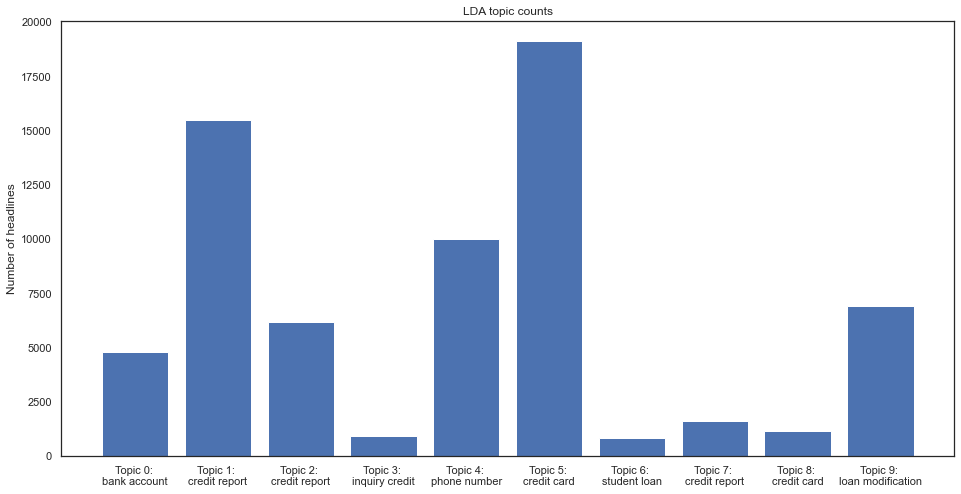

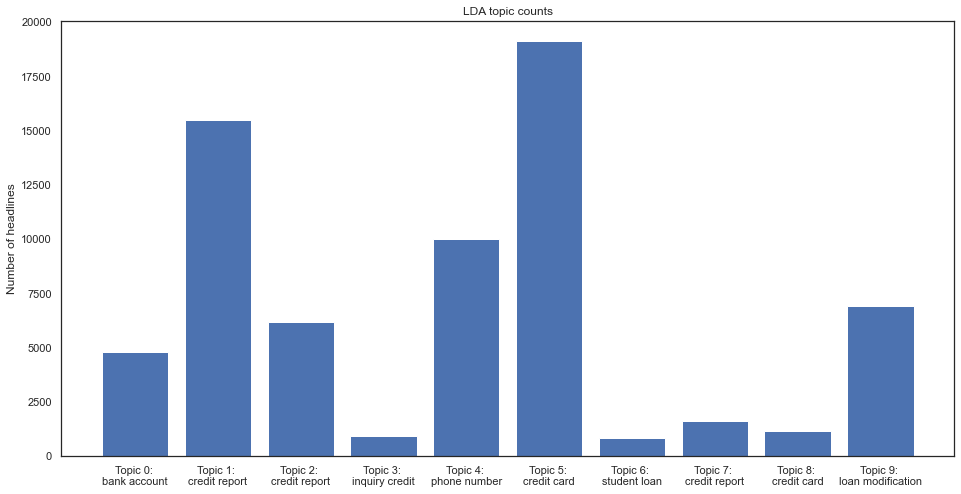

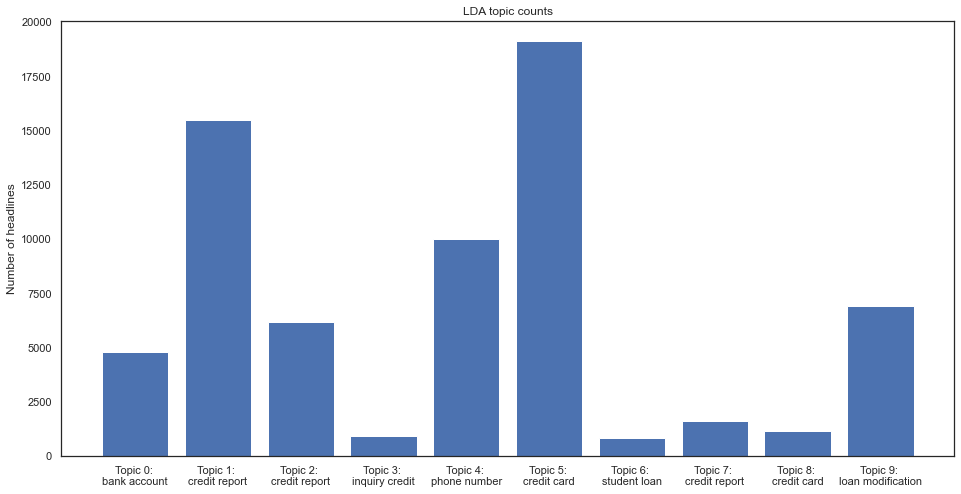

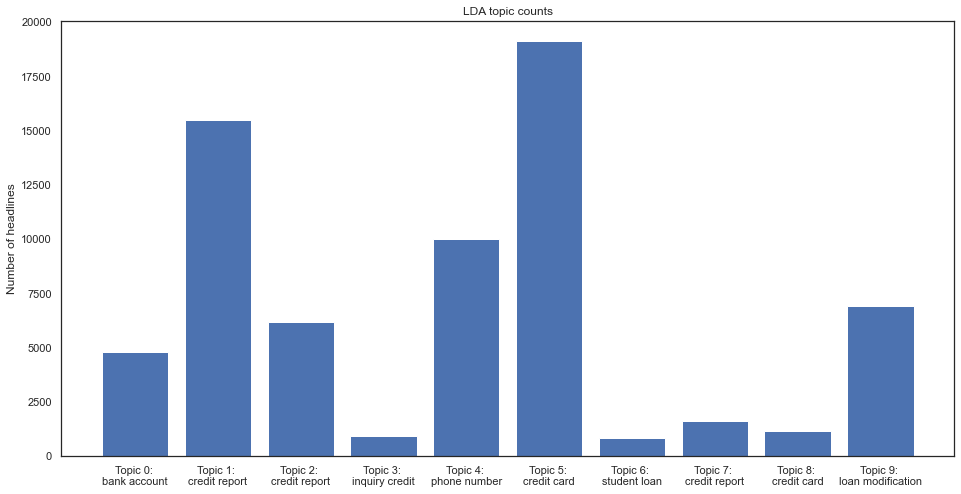

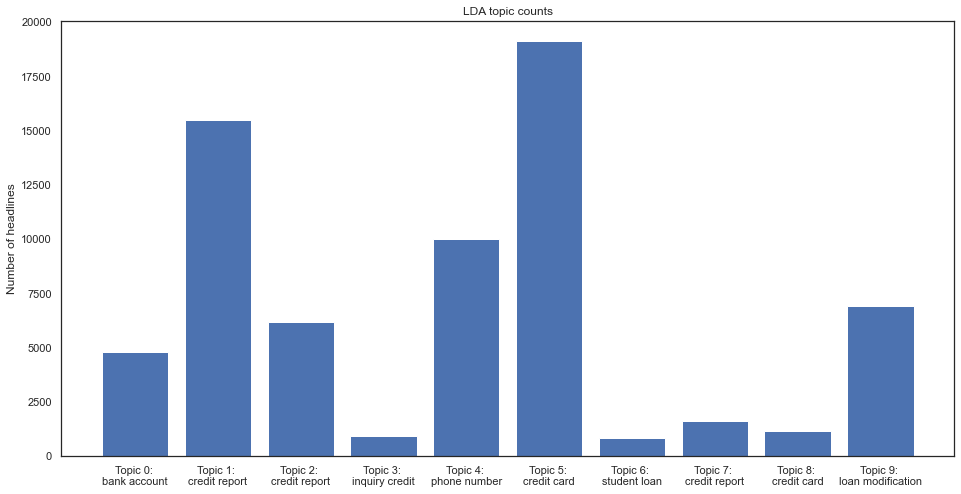

In [67]:

for j in range(5):
    top_n_words = get_top_n_words(1, lda_keys, matrixTFIDF, tfidf_v)
    labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lda_categories]

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(lda_categories, lda_counts);
    ax.set_xticks(lda_categories);
    ax.set_xticklabels(labels);
    ax.set_title('LDA topic counts');
    ax.set_ylabel('Number of headlines'); 
    plt.show()

In [73]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_top)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 66806 samples in 0.558s...
[t-SNE] Computed neighbors for 66806 samples in 132.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66806
[t-SNE] Computed conditional probabilities for sample 2000 / 66806
[t-SNE] Computed conditional probabilities for sample 3000 / 66806
[t-SNE] Computed conditional probabilities for sample 4000 / 66806
[t-SNE] Computed conditional probabilities for sample 5000 / 66806
[t-SNE] Computed conditional probabilities for sample 6000 / 66806
[t-SNE] Computed conditional probabilities for sample 7000 / 66806
[t-SNE] Computed conditional probabilities for sample 8000 / 66806
[t-SNE] Computed conditional probabilities for sample 9000 / 66806
[t-SNE] Computed conditional probabilities for sample 10000 / 66806
[t-SNE] Computed conditional probabilities for sample 11000 / 66806
[t-SNE] Computed conditional probabilities for sample 12000 / 66806
[t-SNE] Computed conditional probabilities for 

In [74]:
top_n_words_lda = get_top_n_words(i, lda_keys, matrixTFIDF, tfidf_v)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
    text=top_n_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

## It can be observed by the difference in both plots of LDA and LSA that LDA has more success identifying topics than LSA which means that LDA appears to be the optimal algorithm for this semantic analysis on this dataset